[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

In [83]:
import pandas as pd

In [84]:
import matplotlib.pyplot as plt

In [85]:
import numpy as np

In [86]:
from datetime import datetime, time

In [87]:
def minutes(row): 
    return row//60

In [207]:
def duration_trip (row): 
    if 0 <= row <= 15:
        return '[0-15]'
    elif 16 <= row <= 30:
        return '[16-30]'
    elif 31 <= row <= 45 :
        return '[31-45]'
    elif 46 <= row <= 60:
        return '[46-60]'
    else: 
        return '[60+]'

In [88]:
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

In [89]:
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_j= pd.read_csv("C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-01.csv", usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

In [112]:
january = df_j[df_j['tpep_pickup_datetime'].dt.year == 2018]
january = january[january['tpep_pickup_datetime'].dt.month == 1]
january = january[january['tpep_dropoff_datetime'].dt.year == 2018]
january = january[january['tpep_dropoff_datetime'].dt.month <= 2]
january = january[january['tpep_dropoff_datetime'] != january['tpep_pickup_datetime']]
january 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,total_amount
0,2018-01-01 00:21:05,2018-01-01 00:24:23,1,0.50,41,24,2,5.80
1,2018-01-01 00:44:55,2018-01-01 01:03:05,1,2.70,239,140,2,15.30
2,2018-01-01 00:08:26,2018-01-01 00:14:21,2,0.80,262,141,1,8.30
3,2018-01-01 00:20:22,2018-01-01 00:52:51,1,10.20,140,257,2,34.80
4,2018-01-01 00:09:18,2018-01-01 00:27:06,2,2.50,246,239,1,16.55
5,2018-01-01 00:29:29,2018-01-01 00:32:48,3,0.50,143,143,2,5.80
6,2018-01-01 00:38:08,2018-01-01 00:48:24,2,1.70,50,239,1,12.35
7,2018-01-01 00:49:29,2018-01-01 00:51:53,1,0.70,239,238,1,6.30
8,2018-01-01 00:56:38,2018-01-01 01:01:05,1,1.00,238,24,1,8.50
9,2018-01-01 00:17:04,2018-01-01 00:22:24,1,0.70,170,170,2,6.80


In [113]:
df_join = pd.merge(january,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])

In [114]:
df_join['duration'] = df_join['tpep_dropoff_datetime']-df_join['tpep_pickup_datetime']

In [115]:
df_join = df_join[df_join['duration'].dt.days == 0]

In [116]:
df_join = df_join[df_join['duration'].dt.seconds <= (3600*4)]

In [117]:
d_minutes = df_join['duration'].dt.seconds
d_minutes = pd.DataFrame(d_minutes)
d_minutes


,duration
0,198
1,1090
2,355
3,1949
4,1068
5,199
6,616
7,144
8,267
9,320


In [118]:
d_minutes = d_minutes['duration'].apply(minutes)

In [119]:
d_minutes_ny = d_minutes.groupby(d_minutes).count()


In [120]:
d_minutes_ny

duration
0       66317
1      124005
2      290426
3      443896
4      539083
5      574840
6      577058
7      558972
8      529684
9      493305
10     453894
11     414360
12     374761
13     337100
14     303448
15     272479
16     244435
17     217759
18     195685
19     174128
20     155137
21     138911
22     124197
23     110892
24      99348
25      88787
26      79416
27      71388
28      63236
29      57043
        ...  
205         4
207         2
208         3
209         1
210         1
211         2
212         1
213         1
214         1
215         2
216         2
217         3
218         5
219         1
220         1
221         1
222         3
223         3
224         1
225         3
226         3
228         3
229         2
230         2
231         2
232         2
235         1
237         1
238         3
239         1
Name: duration, Length: 233, dtype: int64

Dal grafico sottostante possiamo notare che il maggior numero di corse, nel complesso di NY, ha una durata di 10 minuti, le corse superiori ai 10 minuti iniziamo a diminuire per poi stabilizzarsi con un andamento costante dai 40 minuti in poi.    

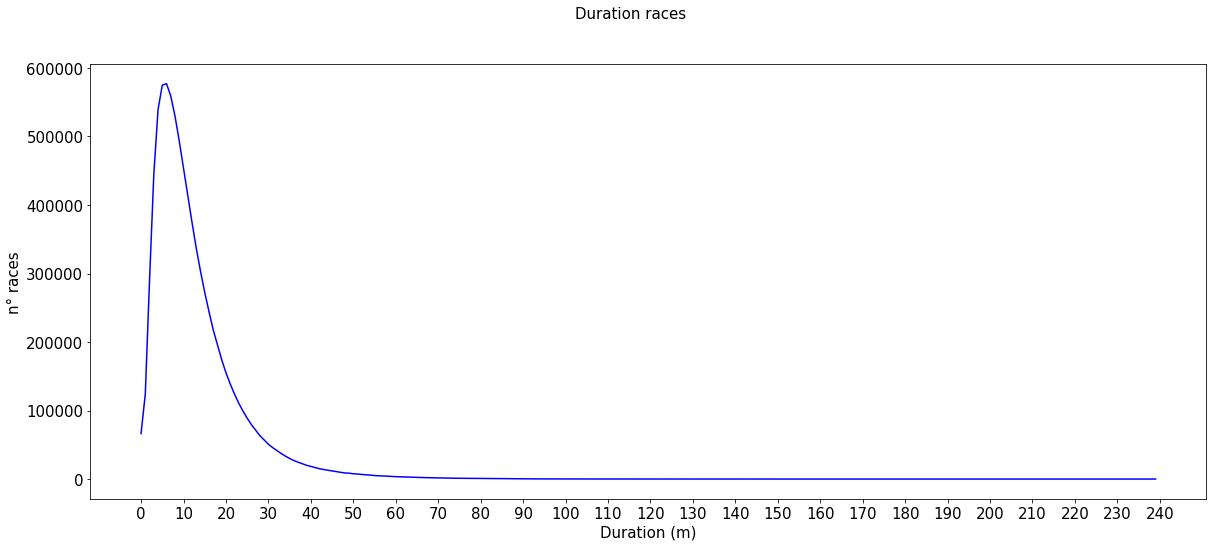

In [121]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(d_minutes_ny, color = 'blue')
fig.suptitle('Duration races',fontsize = 15)
ax.tick_params(labelsize=15)
plt.xlabel('Duration (m)', fontsize=15)
plt.ylabel('n° races', fontsize=15)
plt.xticks(np.arange(0, 241, step=10))
plt.show()

Ripetiamo la nostra analisi per tutti i distretti di NY. Ciò che vogliamo analizzare adesso è la durata delle corse per ciascun distretto. 

In [122]:
df_borough = pd.DataFrame(df_join['Borough'])
df_borough['duration'] = d_minutes
df_borough = df_borough.groupby(['Borough','duration']).duration.count()
df_borough


Borough  duration
Bronx    0           749
         1           198
         2           230
         3           278
         4           352
         5           393
         6           373
         7           336
         8           371
         9           329
         10          338
         11          302
         12          296
         13          246
         14          265
         15          213
         16          206
         17          180
         18          188
         19          147
         20          123
         21          110
         22           98
         23           94
         24           80
         25           67
         26           76
         27           68
         28           54
         29           45
                    ... 
Unknown  116           2
         117           2
         123           1
         124           3
         126           1
         127           2
         131           1
         134           1
       

Ridistribuiamo gli Unknown: creo il dizionario (borough_dict ) del frame precedente. 

In [153]:
borough_dict = df_borough.to_dict()
borough_dict

{('Bronx', 0): 749,
 ('Bronx', 1): 198,
 ('Bronx', 2): 230,
 ('Bronx', 3): 278,
 ('Bronx', 4): 352,
 ('Bronx', 5): 393,
 ('Bronx', 6): 373,
 ('Bronx', 7): 336,
 ('Bronx', 8): 371,
 ('Bronx', 9): 329,
 ('Bronx', 10): 338,
 ('Bronx', 11): 302,
 ('Bronx', 12): 296,
 ('Bronx', 13): 246,
 ('Bronx', 14): 265,
 ('Bronx', 15): 213,
 ('Bronx', 16): 206,
 ('Bronx', 17): 180,
 ('Bronx', 18): 188,
 ('Bronx', 19): 147,
 ('Bronx', 20): 123,
 ('Bronx', 21): 110,
 ('Bronx', 22): 98,
 ('Bronx', 23): 94,
 ('Bronx', 24): 80,
 ('Bronx', 25): 67,
 ('Bronx', 26): 76,
 ('Bronx', 27): 68,
 ('Bronx', 28): 54,
 ('Bronx', 29): 45,
 ('Bronx', 30): 43,
 ('Bronx', 31): 31,
 ('Bronx', 32): 34,
 ('Bronx', 33): 38,
 ('Bronx', 34): 31,
 ('Bronx', 35): 27,
 ('Bronx', 36): 19,
 ('Bronx', 37): 26,
 ('Bronx', 38): 15,
 ('Bronx', 39): 13,
 ('Bronx', 40): 15,
 ('Bronx', 41): 13,
 ('Bronx', 42): 15,
 ('Bronx', 43): 13,
 ('Bronx', 44): 14,
 ('Bronx', 45): 13,
 ('Bronx', 46): 9,
 ('Bronx', 47): 10,
 ('Bronx', 48): 8,
 ('Bronx',

Creo un dizionario (temp) che contiene la somma di tutte le corse di una specifica durata

In [154]:
temp = {}
for i in borough_dict: 
    if i[1] not in temp: 
        temp[i[1]] = borough_dict[i]
    else: 
        temp[i[1]] += borough_dict[i]

Applichiamo la formula per la redistribuzione

In [155]:
for i in borough_dict:
    if ('Unknown',i[1]) in  borough_dict:
        borough_dict[i] += round(((borough_dict[i]/(temp[i[1]]-borough_dict[('Unknown',i[1])]))*100)*(borough_dict[('Unknown',i[1])]/100))    

In [156]:
borough_dict

{('Bronx', 0): 890,
 ('Bronx', 1): 202,
 ('Bronx', 2): 234,
 ('Bronx', 3): 283,
 ('Bronx', 4): 358,
 ('Bronx', 5): 400,
 ('Bronx', 6): 379,
 ('Bronx', 7): 342,
 ('Bronx', 8): 377,
 ('Bronx', 9): 335,
 ('Bronx', 10): 344,
 ('Bronx', 11): 307,
 ('Bronx', 12): 301,
 ('Bronx', 13): 250,
 ('Bronx', 14): 270,
 ('Bronx', 15): 217,
 ('Bronx', 16): 209,
 ('Bronx', 17): 183,
 ('Bronx', 18): 191,
 ('Bronx', 19): 149,
 ('Bronx', 20): 125,
 ('Bronx', 21): 112,
 ('Bronx', 22): 100,
 ('Bronx', 23): 96,
 ('Bronx', 24): 81,
 ('Bronx', 25): 68,
 ('Bronx', 26): 77,
 ('Bronx', 27): 69,
 ('Bronx', 28): 55,
 ('Bronx', 29): 46,
 ('Bronx', 30): 44,
 ('Bronx', 31): 31,
 ('Bronx', 32): 35,
 ('Bronx', 33): 39,
 ('Bronx', 34): 32,
 ('Bronx', 35): 27,
 ('Bronx', 36): 19,
 ('Bronx', 37): 26,
 ('Bronx', 38): 15,
 ('Bronx', 39): 13,
 ('Bronx', 40): 15,
 ('Bronx', 41): 13,
 ('Bronx', 42): 15,
 ('Bronx', 43): 13,
 ('Bronx', 44): 14,
 ('Bronx', 45): 13,
 ('Bronx', 46): 9,
 ('Bronx', 47): 10,
 ('Bronx', 48): 8,
 ('Bronx'

Rimuovo gli Unknown da borough_dict

In [191]:
borough_dict_clean = {}
for i in borough_dict: 
    if (i[0] != 'Unknown'): 
        borough_dict_clean[i] = borough_dict[i]


In [146]:
del borough_dict

In [192]:
borough_dict_clean = pd.DataFrame(pd.Series(borough_dict_clean))
borough_dict_clean.columns = ['n_races']


In [195]:
borough_dict_clean = borough_dict_clean.reset_index()

In [197]:
borough_dict_clean.columns = ['borough', 'minutes', 'n_races']

In [198]:
borough_dict_clean

,borough,minutes,n_races
0,Bronx,0,890
1,Bronx,1,202
2,Bronx,2,234
3,Bronx,3,283
4,Bronx,4,358
5,Bronx,5,400
6,Bronx,6,379
7,Bronx,7,342
8,Bronx,8,377
9,Bronx,9,335


In [208]:
borough_dict_clean['duration_trip'] = borough_dict_clean['minutes'].apply(duration_trip)


In [210]:
borough_dict_clean = borough_dict_clean.groupby(['borough', 'duration_trip']).n_races.sum()

In [247]:
temp1 = borough_dict_clean.to_dict()
temp1

{('Bronx', '[0-15]'): 5489,
 ('Bronx', '[16-30]'): 1605,
 ('Bronx', '[31-45]'): 320,
 ('Bronx', '[46-60]'): 103,
 ('Bronx', '[60+]'): 67,
 ('Brooklyn', '[0-15]'): 69080,
 ('Brooklyn', '[16-30]'): 26704,
 ('Brooklyn', '[31-45]'): 5026,
 ('Brooklyn', '[46-60]'): 844,
 ('Brooklyn', '[60+]'): 283,
 ('EWR', '[0-15]'): 621,
 ('EWR', '[16-30]'): 12,
 ('EWR', '[31-45]'): 8,
 ('EWR', '[46-60]'): 2,
 ('EWR', '[60+]'): 4,
 ('Manhattan', '[0-15]'): 6165475,
 ('Manhattan', '[16-30]'): 1651081,
 ('Manhattan', '[31-45]'): 219339,
 ('Manhattan', '[46-60]'): 37586,
 ('Manhattan', '[60+]'): 16586,
 ('Queens', '[0-15]'): 112844,
 ('Queens', '[16-30]'): 191718,
 ('Queens', '[31-45]'): 146301,
 ('Queens', '[46-60]'): 58722,
 ('Queens', '[60+]'): 25322,
 ('Staten Island', '[0-15]'): 121,
 ('Staten Island', '[16-30]'): 22,
 ('Staten Island', '[31-45]'): 5,
 ('Staten Island', '[46-60]'): 4,
 ('Staten Island', '[60+]'): 3}

In [248]:
total_races = {}
for i in temp1: 
    if i[0] not in total_races: 
        total_races[i[0]] = temp1[i]
    else: 
        total_races[i[0]] += temp1[i]

In [249]:
total_races

{'Bronx': 7584,
 'Brooklyn': 101937,
 'EWR': 647,
 'Manhattan': 8090067,
 'Queens': 534907,
 'Staten Island': 155}

In [252]:
d_percentage = {}
for i in temp1: 
    d_percentage[i] = round((temp1[i] / total_races[i[0]])*100,1)
    
        


In [254]:
d_percentage = pd.Series(d_percentage)

Nel grafico sottostante abbiamo riportato il valore in % per ogni distretto per le durate delle corse. La percentuale è stata ricavata nel seguente modo: 

1) somma corse in ogni distretto

2) numero di corse di ogni durata (per ogni distretto) / somma delle corse in ogni distretto


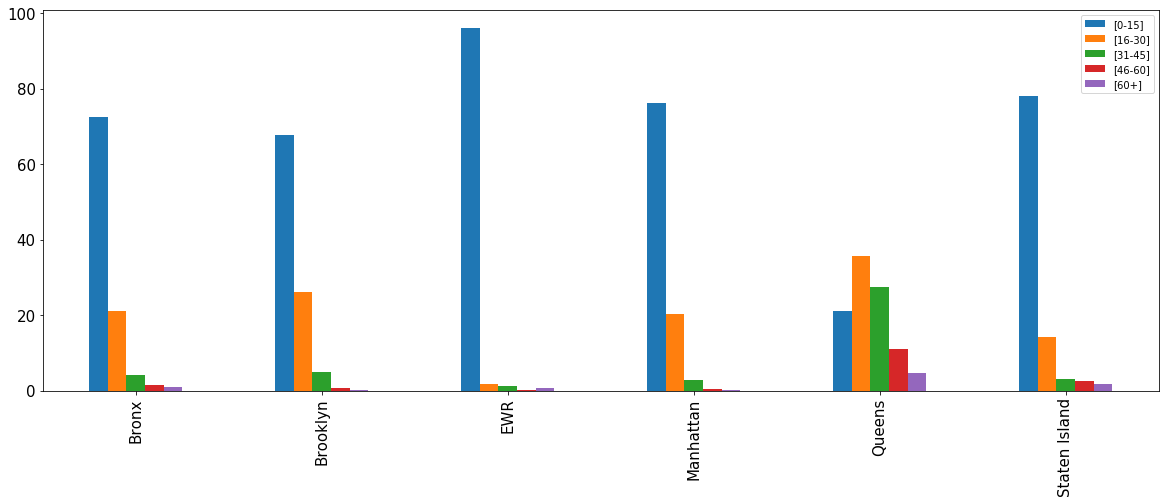

In [260]:
d_percentage.unstack().plot.bar(figsize =(20,7), fontsize = 15)